In [6]:
import pandas as pd

In [7]:
data = pd.read_csv('/Users/tommy/Library/CloudStorage/OneDrive-CalPolyPomona/Fall 2024/Data Mining/CS4990-DataMiningProj/cancer_data.csv')
data.head()

,subject_id,race,sex,age_at_diagnosis,morphology,primary_diagnosis,primary_diagnosis_condition,primary_diagnosis_site,vital_status,treatment_type
0,HCMI.HCM-BROD-0002-C71,white,male,24213,9442/3,Gliosarcoma,Gliomas,Brain,Dead,Chemotherapy
1,HCMI.HCM-BROD-0002-C71,white,male,24213,9442/3,Gliosarcoma,Gliomas,Brain,Dead,Immunotherapy (Including Vaccines)
2,HCMI.HCM-BROD-0002-C71,white,male,24213,9442/3,Gliosarcoma,Gliomas,Brain,Dead,"Surgery, NOS"
3,HCMI.HCM-BROD-0002-C71,white,male,24213,9442/3,Gliosarcoma,Gliomas,Brain,Dead,Targeted Molecular Therapy
4,HCMI.HCM-BROD-0002-C71,white,male,24213,9442/3,Gliosarcoma,Gliomas,Brain,Dead,"Radiation Therapy, NOS"


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14552 entries, 0 to 14551
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   subject_id                   14552 non-null  object
 1   race                         14552 non-null  object
 2   sex                          14552 non-null  object
 3   age_at_diagnosis             14552 non-null  int64 
 4   morphology                   14552 non-null  object
 5   primary_diagnosis            14552 non-null  object
 6   primary_diagnosis_condition  14552 non-null  object
 7   primary_diagnosis_site       14552 non-null  object
 8   vital_status                 14552 non-null  object
 9   treatment_type               14552 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.1+ MB


In [9]:
data['age_at_diagnosis'] = data['age_at_diagnosis'] / 365
data['age_at_diagnosis'] = data['age_at_diagnosis'].astype(int)
data.head()

,subject_id,race,sex,age_at_diagnosis,morphology,primary_diagnosis,primary_diagnosis_condition,primary_diagnosis_site,vital_status,treatment_type
0,HCMI.HCM-BROD-0002-C71,white,male,66,9442/3,Gliosarcoma,Gliomas,Brain,Dead,Chemotherapy
1,HCMI.HCM-BROD-0002-C71,white,male,66,9442/3,Gliosarcoma,Gliomas,Brain,Dead,Immunotherapy (Including Vaccines)
2,HCMI.HCM-BROD-0002-C71,white,male,66,9442/3,Gliosarcoma,Gliomas,Brain,Dead,"Surgery, NOS"
3,HCMI.HCM-BROD-0002-C71,white,male,66,9442/3,Gliosarcoma,Gliomas,Brain,Dead,Targeted Molecular Therapy
4,HCMI.HCM-BROD-0002-C71,white,male,66,9442/3,Gliosarcoma,Gliomas,Brain,Dead,"Radiation Therapy, NOS"


In [10]:
# Define bins and labels
bins = list(range(0, 101, 10))  # Bins: [0, 10), [10, 20), ..., [90, 100)
bins[-1] = 120  # Extend the last bin to include ages > 90
labels = [f"{i}-{i+9}" for i in range(0, 90, 10)] + ["90+"]

# Convert age to categorical
data['age_category'] = pd.cut(data['age_at_diagnosis'], bins=bins, labels=labels, right=False)

data.head()

,subject_id,race,sex,age_at_diagnosis,morphology,primary_diagnosis,primary_diagnosis_condition,primary_diagnosis_site,vital_status,treatment_type,age_category
0,HCMI.HCM-BROD-0002-C71,white,male,66,9442/3,Gliosarcoma,Gliomas,Brain,Dead,Chemotherapy,60-69
1,HCMI.HCM-BROD-0002-C71,white,male,66,9442/3,Gliosarcoma,Gliomas,Brain,Dead,Immunotherapy (Including Vaccines),60-69
2,HCMI.HCM-BROD-0002-C71,white,male,66,9442/3,Gliosarcoma,Gliomas,Brain,Dead,"Surgery, NOS",60-69
3,HCMI.HCM-BROD-0002-C71,white,male,66,9442/3,Gliosarcoma,Gliomas,Brain,Dead,Targeted Molecular Therapy,60-69
4,HCMI.HCM-BROD-0002-C71,white,male,66,9442/3,Gliosarcoma,Gliomas,Brain,Dead,"Radiation Therapy, NOS",60-69


In [11]:
# Selecting relevant categorical columns for transactions
categorical_columns = [
    "race", "sex", "morphology", "primary_diagnosis", 
    "primary_diagnosis_condition", "primary_diagnosis_site", 
    "vital_status", "treatment_type", "age_category"
]

# Transform each row into a set of items representing a transaction
transactions = data[categorical_columns].apply(lambda row: set(row), axis=1).tolist()

# Display a sample of transactions
transactions[:5]

[{'60-69',
  '9442/3',
  'Brain',
  'Chemotherapy',
  'Dead',
  'Gliomas',
  'Gliosarcoma',
  'male',
  'white'},
 {'60-69',
  '9442/3',
  'Brain',
  'Dead',
  'Gliomas',
  'Gliosarcoma',
  'Immunotherapy (Including Vaccines)',
  'male',
  'white'},
 {'60-69',
  '9442/3',
  'Brain',
  'Dead',
  'Gliomas',
  'Gliosarcoma',
  'Surgery, NOS',
  'male',
  'white'},
 {'60-69',
  '9442/3',
  'Brain',
  'Dead',
  'Gliomas',
  'Gliosarcoma',
  'Targeted Molecular Therapy',
  'male',
  'white'},
 {'60-69',
  '9442/3',
  'Brain',
  'Dead',
  'Gliomas',
  'Gliosarcoma',
  'Radiation Therapy, NOS',
  'male',
  'white'}]

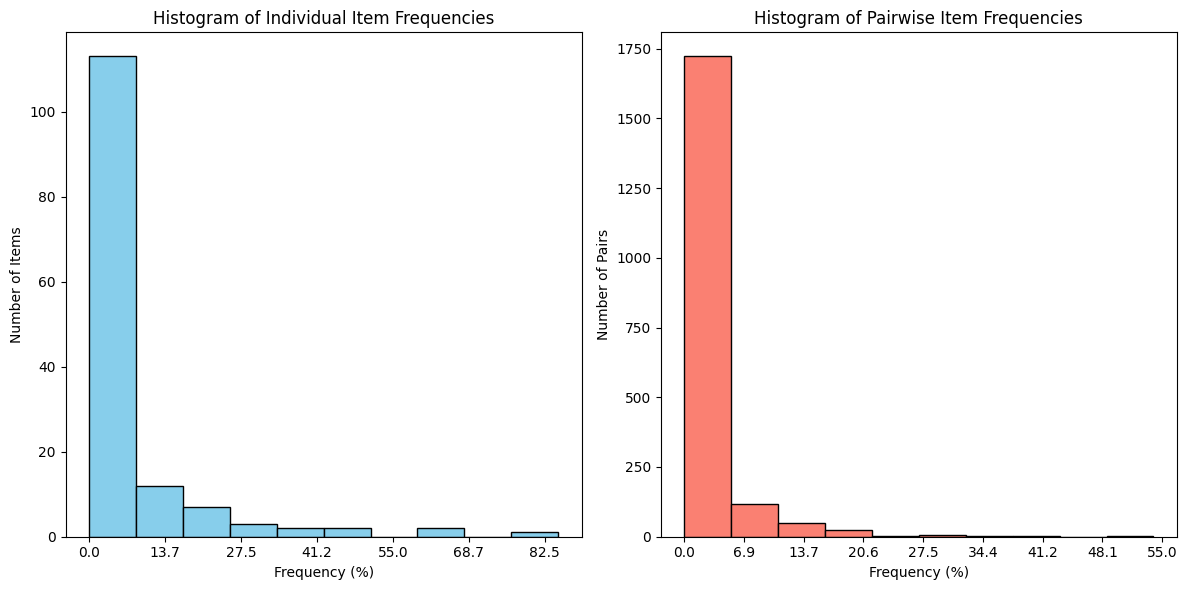

In [12]:
import pandas as pd
from itertools import combinations
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Frequency of Individual Items
item_counts = Counter(item for transaction in transactions for item in transaction)

# Frequency of Pairs of Items
pair_counts = Counter()
for transaction in transactions:
    pairs = combinations(transaction, 2)
    for pair in pairs:
        pair_counts[frozenset(pair)] += 1

# Total number of transactions
total_transactions = len(transactions)

# Create histograms
plt.figure(figsize=(12, 6))

# Individual item frequencies
plt.subplot(1, 2, 1)
plt.hist(item_counts.values(), bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Individual Item Frequencies')
plt.xlabel('Frequency (%)')
plt.ylabel('Number of Items')

# Convert x-axis to percentages
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{(x / total_transactions) * 100:.1f}"))

# Pair frequencies
plt.subplot(1, 2, 2)
plt.hist(pair_counts.values(), bins=10, color='salmon', edgecolor='black')
plt.title('Histogram of Pairwise Item Frequencies')
plt.xlabel('Frequency (%)')
plt.ylabel('Number of Pairs')

# Convert x-axis to percentages
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{(x / total_transactions) * 100:.1f}"))

plt.tight_layout()
plt.show()


In [13]:
from patterns import apriori, association_rules

# Parameters
threshold = 0.2  # Minimum support threshold
metric = "lift"  # Metric for rules
metric_threshold = 1.2  # Threshold for the metric

# Find frequent itemsets
frequent_itemsets = apriori(transactions, threshold)

# Extract association rules
rules = association_rules(transactions, frequent_itemsets, metric, metric_threshold)

# Print results
print("Frequent Itemsets:")
for itemset, support in frequent_itemsets:
    print(f"{set(itemset)}: {support:.2f}")

print("\nAssociation Rules:")
for antecedent, consequent, value in rules:
    print(f"{set(antecedent)} => {set(consequent)} (Metric: {value:.2f})")


Frequent Itemsets:
{'white', 'female', 'Dead'}: 0.20
{'white', 'female', 'Radiation Therapy, NOS'}: 0.27
{'white', 'Alive', 'Radiation Therapy, NOS'}: 0.25
{'white', 'Alive', 'female'}: 0.34
{'white', 'female', 'Pharmaceutical Therapy, NOS'}: 0.27
{'Breast', 'white', 'female'}: 0.22
{'white', 'Alive', 'Pharmaceutical Therapy, NOS'}: 0.25
{'Alive', 'female', 'Radiation Therapy, NOS'}: 0.21
{'Alive', 'female', 'Pharmaceutical Therapy, NOS'}: 0.21
{'Breast', 'Alive', 'female'}: 0.24
{'Breast', 'Infiltrating duct carcinoma, NOS', '8500/3'}: 0.20

Association Rules:
{'Breast'} => {'white', 'female'} (Metric: 1.40)
{'female'} => {'Breast', 'white'} (Metric: 1.52)
{'Breast', 'white'} => {'female'} (Metric: 1.52)
{'white', 'female'} => {'Breast'} (Metric: 1.40)
{'Breast'} => {'Alive', 'female'} (Metric: 1.99)
{'Alive'} => {'Breast', 'female'} (Metric: 1.37)
{'female'} => {'Breast', 'Alive'} (Metric: 1.52)
{'Breast', 'Alive'} => {'female'} (Metric: 1.52)
{'Breast', 'female'} => {'Alive'} (Metri

In [14]:
# Extract association rules
from patterns import apriori, association_rules

def find_association_rules(threshold, metric, metric_threshold):
    # Find frequent itemsets
    frequent_itemsets = apriori(transactions, threshold)

    # Extract association rules
    rules = association_rules(transactions, frequent_itemsets, metric, metric_threshold)

    # Print results
    print("Frequent Itemsets:")
    for itemset, support in frequent_itemsets:
        print(f"{set(itemset)}: {support:.2f}")

    print("\nAssociation Rules:")
    for antecedent, consequent, value in rules:
        print(f"{set(antecedent)} => {set(consequent)} (Metric: {value:.2f})")

# Parameters
threshold = 0.2  # Minimum support threshold
metric = "max"  # Metric for rules
metric_threshold = 0.8  # Threshold for the metric
find_association_rules(threshold, metric, metric_threshold)

Frequent Itemsets:
{'white', 'female', 'Dead'}: 0.20
{'white', 'female', 'Radiation Therapy, NOS'}: 0.27
{'white', 'Alive', 'Radiation Therapy, NOS'}: 0.25
{'white', 'Alive', 'female'}: 0.34
{'white', 'female', 'Pharmaceutical Therapy, NOS'}: 0.27
{'Breast', 'white', 'female'}: 0.22
{'white', 'Alive', 'Pharmaceutical Therapy, NOS'}: 0.25
{'Alive', 'female', 'Radiation Therapy, NOS'}: 0.21
{'Alive', 'female', 'Pharmaceutical Therapy, NOS'}: 0.21
{'Breast', 'Alive', 'female'}: 0.24
{'Breast', 'Infiltrating duct carcinoma, NOS', '8500/3'}: 0.20

Association Rules:
{'white'} => {'female', 'Dead'} (Metric: 0.89)
{'female', 'Dead'} => {'white'} (Metric: 0.89)
{'white'} => {'female', 'Radiation Therapy, NOS'} (Metric: 0.83)
{'female', 'Radiation Therapy, NOS'} => {'white'} (Metric: 0.83)
{'white'} => {'Alive', 'Radiation Therapy, NOS'} (Metric: 0.82)
{'Alive', 'Radiation Therapy, NOS'} => {'white'} (Metric: 0.82)
{'white'} => {'female', 'Pharmaceutical Therapy, NOS'} (Metric: 0.83)
{'female',

In [15]:
# Parameters
threshold = 0.2  # Minimum support threshold
metric = "max"  # Metric for rules
metric_threshold = 0.8  # Threshold for the metric

# Find frequent itemsets
frequent_itemsets = apriori(transactions, threshold)

# Extract association rules
rules = association_rules(transactions, frequent_itemsets, metric, metric_threshold)

# Print results
print("Frequent Itemsets:")
for itemset, support in frequent_itemsets:
    print(f"{set(itemset)}: {support:.2f}")

print("\nAssociation Rules:")
for antecedent, consequent, value in rules:
    print(f"{set(antecedent)} => {set(consequent)} (Metric: {value:.2f})")

Frequent Itemsets:
{'white', 'female', 'Dead'}: 0.20
{'white', 'female', 'Radiation Therapy, NOS'}: 0.27
{'white', 'Alive', 'Radiation Therapy, NOS'}: 0.25
{'white', 'Alive', 'female'}: 0.34
{'white', 'female', 'Pharmaceutical Therapy, NOS'}: 0.27
{'Breast', 'white', 'female'}: 0.22
{'white', 'Alive', 'Pharmaceutical Therapy, NOS'}: 0.25
{'Alive', 'female', 'Radiation Therapy, NOS'}: 0.21
{'Alive', 'female', 'Pharmaceutical Therapy, NOS'}: 0.21
{'Breast', 'Alive', 'female'}: 0.24
{'Breast', 'Infiltrating duct carcinoma, NOS', '8500/3'}: 0.20

Association Rules:
{'white'} => {'female', 'Dead'} (Metric: 0.89)
{'female', 'Dead'} => {'white'} (Metric: 0.89)
{'white'} => {'female', 'Radiation Therapy, NOS'} (Metric: 0.83)
{'female', 'Radiation Therapy, NOS'} => {'white'} (Metric: 0.83)
{'white'} => {'Alive', 'Radiation Therapy, NOS'} (Metric: 0.82)
{'Alive', 'Radiation Therapy, NOS'} => {'white'} (Metric: 0.82)
{'white'} => {'female', 'Pharmaceutical Therapy, NOS'} (Metric: 0.83)
{'female',

In [16]:
# Parameters
threshold = 0.2  # Minimum support threshold
metric = "kulczynski"  # Metric for rules
metric_threshold = 0.5  # Threshold for the metric

# Find frequent itemsets
frequent_itemsets = apriori(transactions, threshold)

# Extract association rules
rules = association_rules(transactions, frequent_itemsets, metric, metric_threshold)

# Print results
print("Frequent Itemsets:")
for itemset, support in frequent_itemsets:
    print(f"{set(itemset)}: {support:.2f}")

print("\nAssociation Rules:")
for antecedent, consequent, value in rules:
    print(f"{set(antecedent)} => {set(consequent)} (Metric: {value:.2f})")

Frequent Itemsets:
{'white', 'female', 'Dead'}: 0.20
{'white', 'female', 'Radiation Therapy, NOS'}: 0.27
{'white', 'Alive', 'Radiation Therapy, NOS'}: 0.25
{'white', 'Alive', 'female'}: 0.34
{'white', 'female', 'Pharmaceutical Therapy, NOS'}: 0.27
{'Breast', 'white', 'female'}: 0.22
{'white', 'Alive', 'Pharmaceutical Therapy, NOS'}: 0.25
{'Alive', 'female', 'Radiation Therapy, NOS'}: 0.21
{'Alive', 'female', 'Pharmaceutical Therapy, NOS'}: 0.21
{'Breast', 'Alive', 'female'}: 0.24
{'Breast', 'Infiltrating duct carcinoma, NOS', '8500/3'}: 0.20

Association Rules:
{'white'} => {'female', 'Dead'} (Metric: 0.56)
{'female', 'Dead'} => {'white'} (Metric: 0.56)
{'white'} => {'female', 'Radiation Therapy, NOS'} (Metric: 0.57)
{'female'} => {'white', 'Radiation Therapy, NOS'} (Metric: 0.52)
{'Radiation Therapy, NOS'} => {'white', 'female'} (Metric: 0.52)
{'white', 'female'} => {'Radiation Therapy, NOS'} (Metric: 0.52)
{'white', 'Radiation Therapy, NOS'} => {'female'} (Metric: 0.52)
{'female', 'R

In [17]:
# Parameters
threshold = 0.2  # Minimum support threshold
metric = "cosine"  # Metric for rules
metric_threshold = 0.5  # Threshold for the metric

# Find frequent itemsets
frequent_itemsets = apriori(transactions, threshold)

# Extract association rules
rules = association_rules(transactions, frequent_itemsets, metric, metric_threshold)

# Print results
print("Frequent Itemsets:")
for itemset, support in frequent_itemsets:
    print(f"{set(itemset)}: {support:.2f}")

print("\nAssociation Rules:")
for antecedent, consequent, value in rules:
    print(f"{set(antecedent)} => {set(consequent)} (Metric: {value:.2f})")

Frequent Itemsets:
{'white', 'female', 'Dead'}: 0.20
{'white', 'female', 'Radiation Therapy, NOS'}: 0.27
{'white', 'Alive', 'Radiation Therapy, NOS'}: 0.25
{'white', 'Alive', 'female'}: 0.34
{'white', 'female', 'Pharmaceutical Therapy, NOS'}: 0.27
{'Breast', 'white', 'female'}: 0.22
{'white', 'Alive', 'Pharmaceutical Therapy, NOS'}: 0.25
{'Alive', 'female', 'Radiation Therapy, NOS'}: 0.21
{'Alive', 'female', 'Pharmaceutical Therapy, NOS'}: 0.21
{'Breast', 'Alive', 'female'}: 0.24
{'Breast', 'Infiltrating duct carcinoma, NOS', '8500/3'}: 0.20

Association Rules:
{'white'} => {'female', 'Radiation Therapy, NOS'} (Metric: 0.51)
{'female'} => {'white', 'Radiation Therapy, NOS'} (Metric: 0.51)
{'Radiation Therapy, NOS'} => {'white', 'female'} (Metric: 0.52)
{'white', 'female'} => {'Radiation Therapy, NOS'} (Metric: 0.52)
{'white', 'Radiation Therapy, NOS'} => {'female'} (Metric: 0.51)
{'female', 'Radiation Therapy, NOS'} => {'white'} (Metric: 0.51)
{'Radiation Therapy, NOS'} => {'white', 'A

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14552 entries, 0 to 14551
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   subject_id                   14552 non-null  object  
 1   race                         14552 non-null  object  
 2   sex                          14552 non-null  object  
 3   age_at_diagnosis             14552 non-null  int64   
 4   morphology                   14552 non-null  object  
 5   primary_diagnosis            14552 non-null  object  
 6   primary_diagnosis_condition  14552 non-null  object  
 7   primary_diagnosis_site       14552 non-null  object  
 8   vital_status                 14552 non-null  object  
 9   treatment_type               14552 non-null  object  
 10  age_category                 14552 non-null  category
dtypes: category(1), int64(1), object(9)
memory usage: 1.1+ MB


In [19]:
data['primary_diagnosis'].value_counts()

primary_diagnosis
Infiltrating duct carcinoma, NOS                            2942
Glioblastoma                                                2501
Serous cystadenocarcinoma, NOS                              2164
Clear cell adenocarcinoma, NOS                              2060
Papillary adenocarcinoma, NOS                               1096
Lobular carcinoma, NOS                                       748
Mixed glioma                                                 520
Astrocytoma, anaplastic                                      512
Renal cell carcinoma, chromophobe type                       444
Oligodendroglioma, NOS                                       432
Oligodendroglioma, anaplastic                                304
Astrocytoma, NOS                                             248
Infiltrating duct and lobular carcinoma                      108
Infiltrating duct mixed with other types of carcinoma         76
Metaplastic carcinoma, NOS                                    62
Mucinou